<a href="https://colab.research.google.com/github/deepraj1/Handwriting-Detection/blob/main/Number-Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [26]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train = x_train/256
x_test = x_test/256

(60000, 28, 28)

In [27]:
x_train_flat = x_train.reshape(len(x_train),28*28)
x_test_flat = x_test.reshape(len(x_test),28*28)
x_train_flat.shape

(60000, 784)

In [30]:
model = keras.Sequential([
                          keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flat,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4726 - accuracy: 0.8759
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3041 - accuracy: 0.9142
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2835 - accuracy: 0.9205
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9234
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9261
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2621 - accuracy: 0.9276
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2587 - accuracy: 0.9278
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2552 - accuracy: 0.9293
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2531 - accuracy: 0.9296
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.251

In [31]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2627 - accuracy: 0.9279


[0.26274654269218445, 0.9279000163078308]

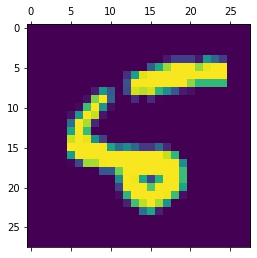

In [46]:
plt.matshow(x_test[8])

In [47]:
predict = model.predict(x_test_flat)
np.argmax(predict[8])


6

In [55]:
y_predicted = [np.argmax(i) for i in predict]
matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 952,    0,    3,    2,    0,    7,   11,    4,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   3,    8,  932,   15,    6,    5,   13,   10,   36,    4],
       [   2,    0,   17,  922,    0,   26,    2,   10,   25,    6],
       [   1,    1,    5,    2,  899,    0,   17,    5,   10,   42],
       [   7,    2,    3,   35,    8,  784,   15,    7,   27,    4],
       [   7,    3,    7,    1,    7,   12,  917,    2,    2,    0],
       [   1,    6,   22,    4,    3,    0,    0,  955,    2,   35],
       [   6,    6,    6,   21,    8,   23,   11,   12,  873,    8],
       [   9,    7,    1,   10,   17,    6,    0,   19,    6,  934]],
      dtype=int32)>

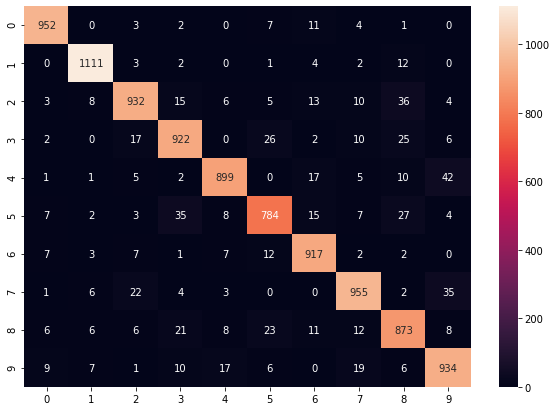

In [56]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(matrix,annot=True,fmt='d')

In [80]:
model = keras.Sequential([
                          keras.layers.Dense(128,input_shape=(784,),activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2565 - accuracy: 0.9255
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1118 - accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0777 - accuracy: 0.9759
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0572 - accuracy: 0.9830
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0435 - accuracy: 0.9865


In [81]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0786 - accuracy: 0.9759


[0.07861986011266708, 0.9758999943733215]

In [63]:
predict = model.predict(x_test_flat)

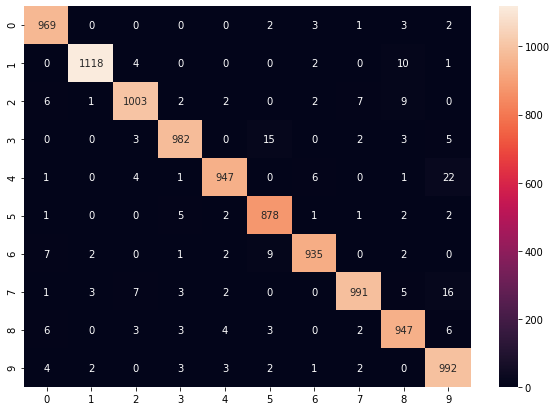

In [64]:
y_predicted = [np.argmax(i) for i in predict]
matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
plt.figure(figsize=(10,7))
sb.heatmap(matrix,annot=True,fmt='d')

In [79]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2611 - accuracy: 0.9246
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1169 - accuracy: 0.9657
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0795 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0594 - accuracy: 0.9816
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0459 - accuracy: 0.9859


In [73]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 20.2422 - accuracy: 0.0990


[20.24220085144043, 0.0989999994635582]

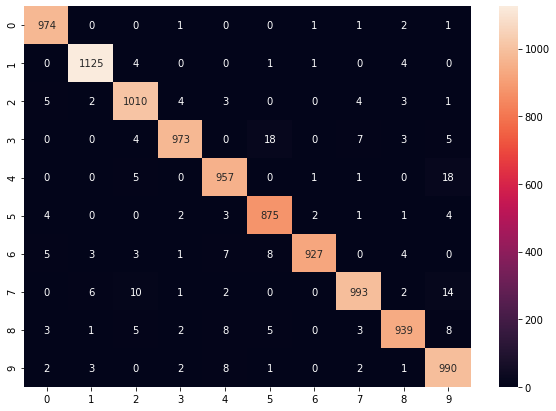

In [69]:
predict = model.predict(x_test_flat)
y_predicted = [np.argmax(i) for i in predict]
matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
plt.figure(figsize=(10,7))
sb.heatmap(matrix,annot=True,fmt='d')